<a href="https://colab.research.google.com/github/celiahc823/conexionBD/blob/main/ConexionBD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mysql.connector

## Creación de la base de datos

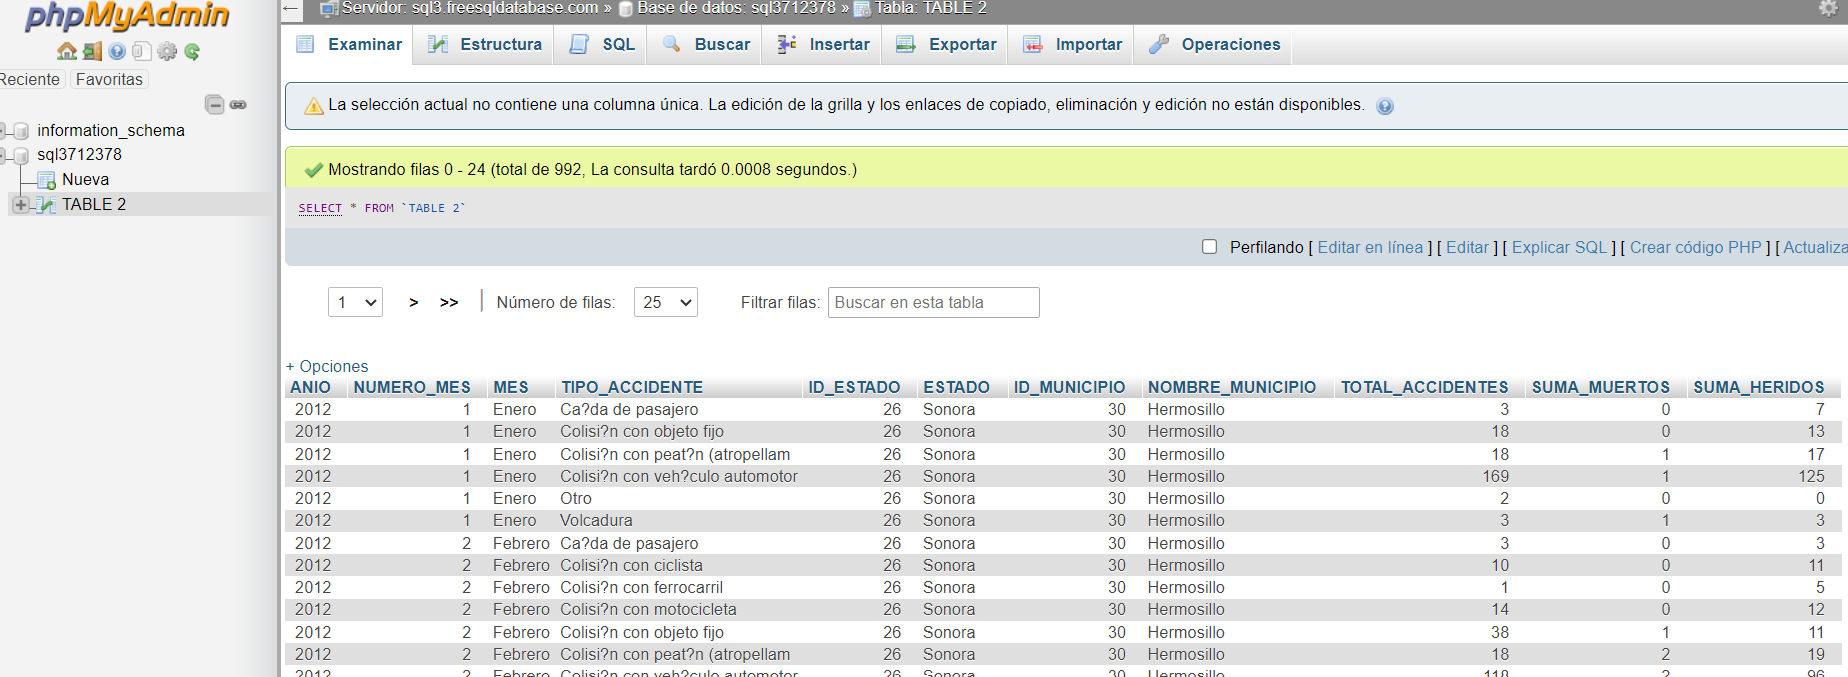

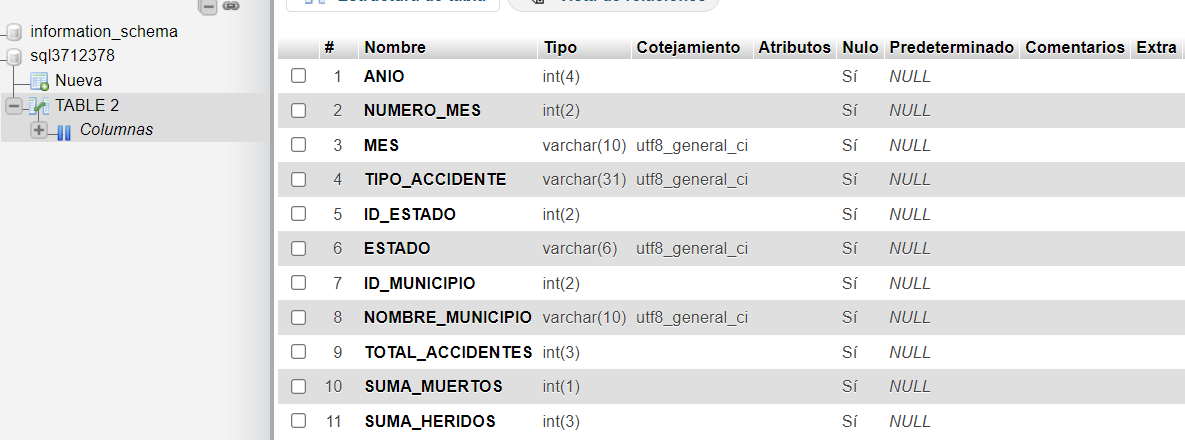

In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conexión a la base de datos
conn = mysql.connector.connect(
    host="sql3.freesqldatabase.com",
    user="sql3712378",
    password="bHJa4wvqsk",
    database="sql3712378"
)

try:
    # Creación del cursor
    mycursor = conn.cursor(buffered=True)

    # Ejecución de la consulta
    mycursor.execute("""
        SELECT `NUMERO_MES`, `MES`, `TIPO_ACCIDENTE`, `NOMBRE_MUNICIPIO`, `TOTAL_ACCIDENTES`, `SUMA_MUERTOS`, `SUMA_HERIDOS`
        FROM `TABLE 2`
        WHERE `ANIO` = 2020 AND `NOMBRE_MUNICIPIO` = 'HERMOSILLO'
    """)

    # Obtención de los resultados
    result = mycursor.fetchall()

    # Nombres de las columnas
    column_names = [desc[0] for desc in mycursor.description]

    # Creación del DataFrame
    df = pd.DataFrame(result, columns=column_names)

    # Impresión del DataFrame
    print(df)

finally:
    # Cierre del cursor y la conexión
    mycursor.close()
    conn.close()

     NUMERO_MES        MES                   TIPO_ACCIDENTE NOMBRE_MUNICIPIO  \
0             1      Enero                Ca?da de pasajero       Hermosillo   
1             1      Enero              Colisi?n con animal       Hermosillo   
2             1      Enero            Colisi?n con ciclista       Hermosillo   
3             1      Enero         Colisi?n con motocicleta       Hermosillo   
4             1      Enero         Colisi?n con objeto fijo       Hermosillo   
..          ...        ...                              ...              ...   
98           12  Diciembre         Colisi?n con objeto fijo       Hermosillo   
99           12  Diciembre  Colisi?n con peat?n (atropellam       Hermosillo   
100          12  Diciembre  Colisi?n con veh?culo automotor       Hermosillo   
101          12  Diciembre                Salida del camino       Hermosillo   
102          12  Diciembre                        Volcadura       Hermosillo   

     TOTAL_ACCIDENTES  SUMA_MUERTOS  SU

In [3]:
df.head()

,NUMERO_MES,MES,TIPO_ACCIDENTE,NOMBRE_MUNICIPIO,TOTAL_ACCIDENTES,SUMA_MUERTOS,SUMA_HERIDOS
0,1,Enero,Ca?da de pasajero,Hermosillo,3,0,3
1,1,Enero,Colisi?n con animal,Hermosillo,2,0,0
2,1,Enero,Colisi?n con ciclista,Hermosillo,12,0,0
3,1,Enero,Colisi?n con motocicleta,Hermosillo,18,0,0
4,1,Enero,Colisi?n con objeto fijo,Hermosillo,25,0,0


In [4]:
df_pivot = df.pivot_table(
        index='TIPO_ACCIDENTE',
        columns='NUMERO_MES',
        values='TOTAL_ACCIDENTES',
        aggfunc='sum',
        fill_value=0
    )

    # Mostrar la tabla pivot
print(df_pivot)

NUMERO_MES                        1    2    3   4   5   6   7    8    9    10  \
TIPO_ACCIDENTE                                                                  
Ca?da de pasajero                  3    3    0   1   1   1   2    5    3    3   
Colisi?n con animal                2    1    1   2   1   3   3    1    0    3   
Colisi?n con ciclista             12   10    6   6   3   3   5    5   11   16   
Colisi?n con motocicleta          18   19   25  11  20  17  25   15   19   24   
Colisi?n con objeto fijo          25   29   26  15  21  29  28   29   22   19   
Colisi?n con peat?n (atropellam   12   19    9   8   5  10  10   13   10   12   
Colisi?n con veh?culo automotor  113  111  108  58  68  78  99  100  106  117   
Salida del camino                  6    5    5   1   1   2   2    0    0    0   
Volcadura                          5    4    6   3   2   7   5    8   11   13   

NUMERO_MES                        11   12  
TIPO_ACCIDENTE                             
Ca?da de pasajero   

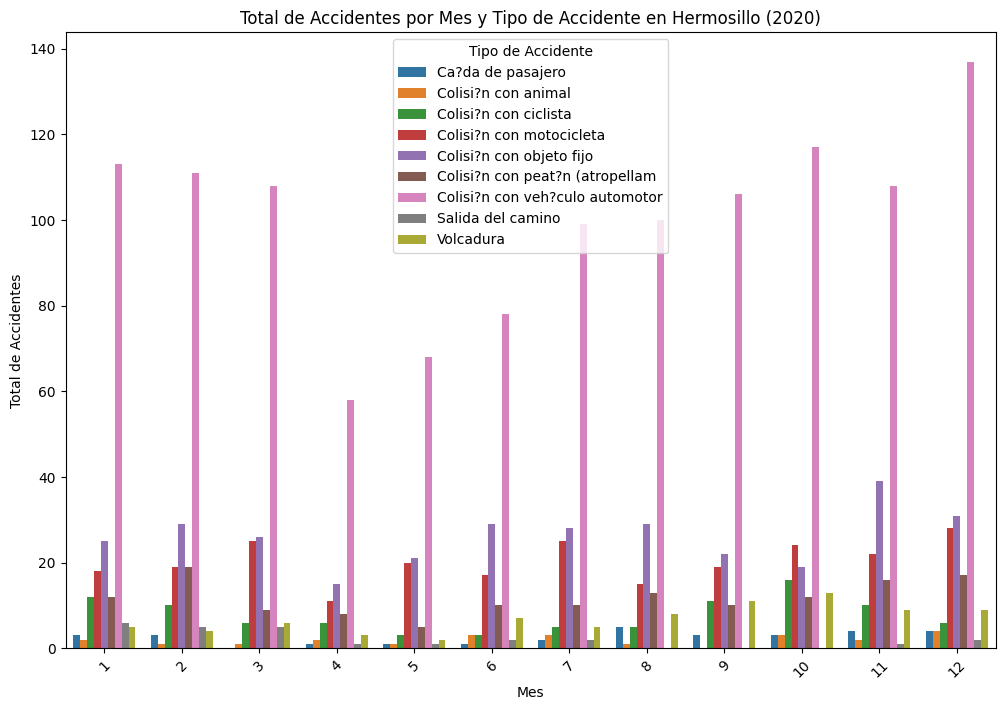

In [5]:
pivot_table = df_pivot.reset_index()

    # Crear el gráfico
plt.figure(figsize=(12, 8))
pivot_table_melted = pivot_table.melt(id_vars='TIPO_ACCIDENTE', var_name='Mes', value_name='Total_Accidentes')
sns.barplot(data=pivot_table_melted, x='Mes', y='Total_Accidentes', hue='TIPO_ACCIDENTE')
plt.title('Total de Accidentes por Mes y Tipo de Accidente en Hermosillo (2020)')
plt.xlabel('Mes')
plt.ylabel('Total de Accidentes')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Accidente')
plt.show()

In [6]:
# Agrupación por tipo_accidente y su total por mes
grouped = df.groupby(['NUMERO_MES', 'TIPO_ACCIDENTE'])['TOTAL_ACCIDENTES'].sum().reset_index()

# Order and get the top 3 by month
top3_per_month = grouped.groupby('NUMERO_MES').apply(lambda x: x.nlargest(3, 'TOTAL_ACCIDENTES')).reset_index(drop=True)

# Show the result
print(top3_per_month)

    NUMERO_MES                   TIPO_ACCIDENTE  TOTAL_ACCIDENTES
0            1  Colisi?n con veh?culo automotor               113
1            1         Colisi?n con objeto fijo                25
2            1         Colisi?n con motocicleta                18
3            2  Colisi?n con veh?culo automotor               111
4            2         Colisi?n con objeto fijo                29
5            2         Colisi?n con motocicleta                19
6            3  Colisi?n con veh?culo automotor               108
7            3         Colisi?n con objeto fijo                26
8            3         Colisi?n con motocicleta                25
9            4  Colisi?n con veh?culo automotor                58
10           4         Colisi?n con objeto fijo                15
11           4         Colisi?n con motocicleta                11
12           5  Colisi?n con veh?culo automotor                68
13           5         Colisi?n con objeto fijo                21
14        

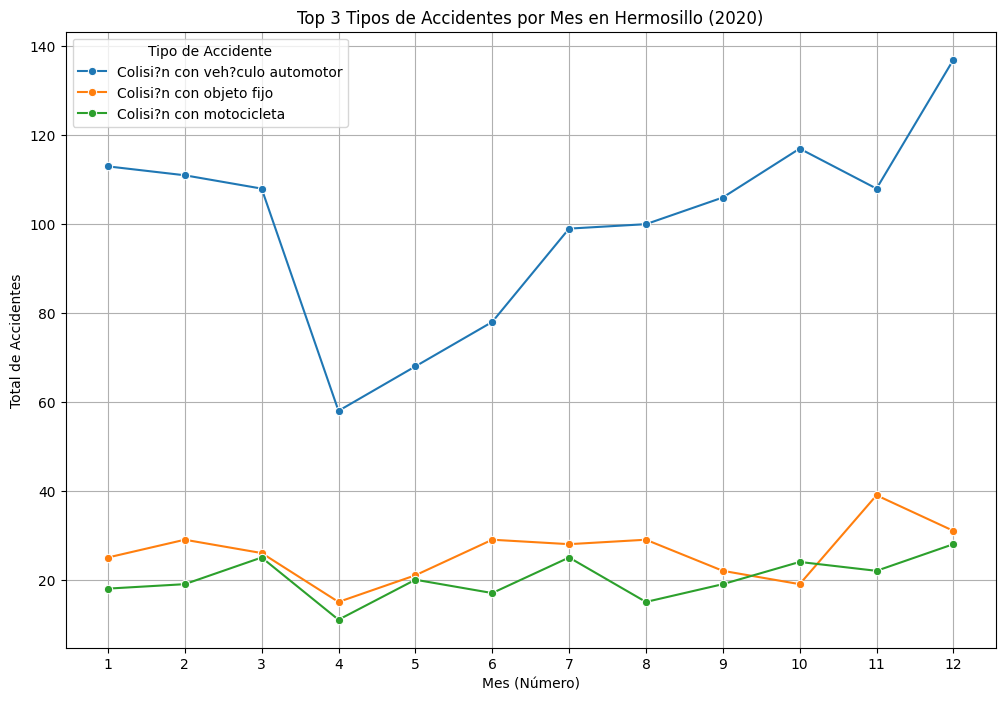

In [7]:
 # Crear el gráfico de líneas
plt.figure(figsize=(12, 8))
sns.lineplot(data=top3_per_month, x='NUMERO_MES', y='TOTAL_ACCIDENTES', hue='TIPO_ACCIDENTE', marker='o')
plt.title('Top 3 Tipos de Accidentes por Mes en Hermosillo (2020)')
plt.xlabel('Mes (Número)')
plt.ylabel('Total de Accidentes')
plt.xticks(top3_per_month['NUMERO_MES'].unique())
plt.legend(title='Tipo de Accidente', loc='upper left')
plt.grid(True)
plt.show()

In [8]:
#agrupación por tipo de accidentes por mes cantidad de heridos
grouped_heridos = df.groupby(['NUMERO_MES', 'TIPO_ACCIDENTE'])['SUMA_HERIDOS'].sum().reset_index()

# top 3por mes
top3_per_month_heridos = grouped_heridos.groupby('NUMERO_MES').apply(lambda x: x.nlargest(3, 'SUMA_HERIDOS')).reset_index(drop=True)

# Show the result
print(top3_per_month_heridos)

    NUMERO_MES                   TIPO_ACCIDENTE  SUMA_HERIDOS
0            1  Colisi?n con peat?n (atropellam            12
1            1                Ca?da de pasajero             3
2            1              Colisi?n con animal             0
3            2  Colisi?n con veh?culo automotor            22
4            2  Colisi?n con peat?n (atropellam            18
5            2         Colisi?n con motocicleta            14
6            3  Colisi?n con veh?culo automotor            34
7            3         Colisi?n con motocicleta            15
8            3  Colisi?n con peat?n (atropellam             7
9            4         Colisi?n con motocicleta             6
10           4  Colisi?n con peat?n (atropellam             6
11           4  Colisi?n con veh?culo automotor             5
12           5         Colisi?n con motocicleta            14
13           5  Colisi?n con veh?culo automotor            14
14           5  Colisi?n con peat?n (atropellam             4
15      

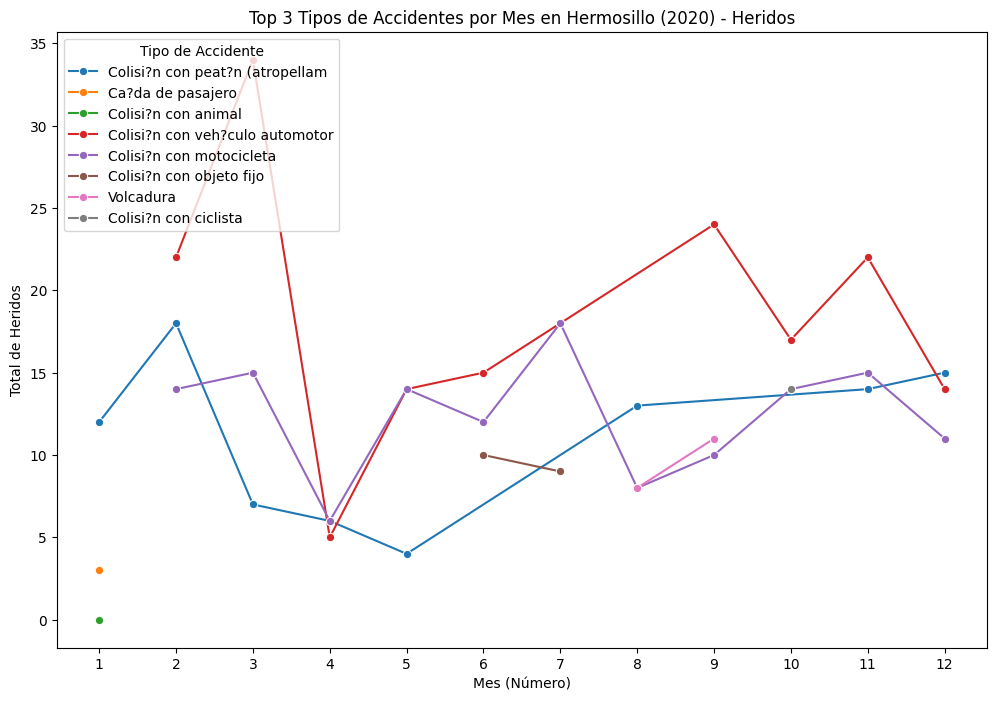

In [13]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=top3_per_month_heridos, x='NUMERO_MES', y='SUMA_HERIDOS', hue='TIPO_ACCIDENTE', marker='o')
plt.title('Top 3 Tipos de Accidentes por Mes en Hermosillo (2020) - Heridos')
plt.xlabel('Mes (Número)')
plt.ylabel('Total de Heridos')
plt.xticks(top3_per_month_heridos['NUMERO_MES'].unique())
plt.legend(title='Tipo de Accidente', loc='upper left')

In [21]:
# creación de uan valriable
if 'TOTAL_ACCIDENTES' not in grouped.columns:
 grouped['SUMA_ACCIDENTES'] = df.groupby(['NUMERO_MES', 'TIPO_ACCIDENTE']== 'Colisi?n con veh?culo automotor')['TOTAL_ACCIDENTES'].sum().reset_index(drop=True)

# creación de uan valriable

if 'SUMA_MUERTOS' not in grouped.columns:
 grouped['SUMA_MUERTOS'] = df.groupby(['NUMERO_MES', 'TIPO_ACCIDENTE'])['SUMA_MUERTOS'].sum().reset_index(drop=True)


In [22]:
 # Filtrar datos para "COLISION CON VEHICULO AUTOMOTOR"
df_colision_v = df[df['TIPO_ACCIDENTE'] == 'Colisi?n con veh?culo automotor']

    # Agrupar y sumar por mes
grouped = df_colision_v.groupby('NUMERO_MES').sum().reset_index()

    # Seleccionar las columnas deseadas
table = grouped[['NUMERO_MES', 'TOTAL_ACCIDENTES', 'SUMA_HERIDOS', 'SUMA_MUERTOS']]

    # Renombrar las columnas para mayor claridad
table.columns = ['NUMERO_MES', 'Total Accidentes', 'Suma Heridos', 'Suma Muertos']

    # Mostrar la tabla
print(table)



    NUMERO_MES  Total Accidentes  Suma Heridos  Suma Muertos
0            1               113             0             0
1            2               111            22             0
2            3               108            34             0
3            4                58             5             0
4            5                68            14             0
5            6                78            15             0
6            7                99            18             0
7            8               100             7             2
8            9               106            24             3
9           10               117            17             0
10          11               108            22             2
11          12               137            14             0


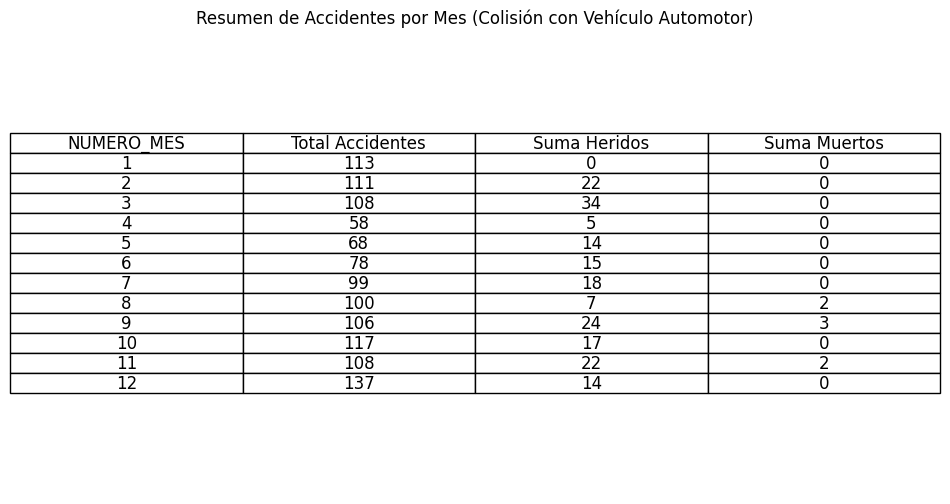

In [23]:
    # Crear una tabla con líneas usando matplotlib
fig, ax = plt.subplots(figsize=(10, 6))  # Tamaño de la figura
ax.axis('tight')
ax.axis('off')
table_plot = ax.table(
cellText=table.values,
colLabels=table.columns,
cellLoc='center',
loc='center'
    )
table_plot.auto_set_font_size(False)
table_plot.set_fontsize(12)
table_plot.scale(1.2, 1.2)  # Escalar la tabla para una mejor visualización
plt.title('Resumen de Accidentes por Mes (Colisión con Vehículo Automotor)')
plt.show()